In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x_train = np.array([[4.7], [2.4], [7.5], [2.1], [4.3],
                   [7.8], [8.9], [5.2], [4.59], [2.1],
                   [8], [5], [7.5], [5], [4],
                   [8], [5.2], [4.9] ,[3] ,[4.7],
                   [4], [4.8], [3.5], [2.1], [4.1]],
                   dtype = np.float32)
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4],
                   [3.3], [2.6], [1.96], [3.13], [1.76],
                   [3.2], [2.1], [1.6], [2.5], [2.2],
                   [2.75], [2.4], [1.8] ,[1] ,[2],
                   [1.6], [2.4], [2.6], [1.5], [3.1]],
                   dtype = np.float32)

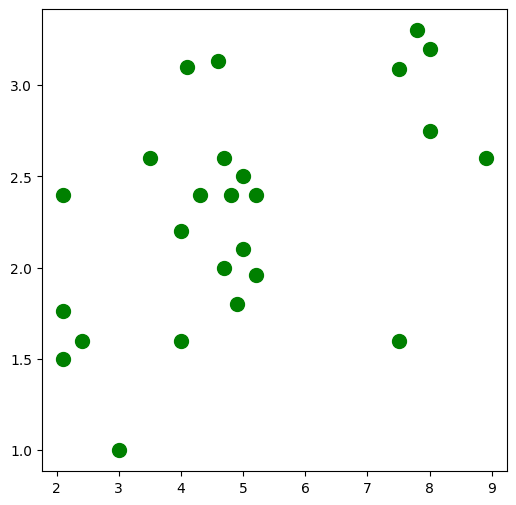

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(x_train, y_train, c="green", s=100, label = "Original Data")
plt.show()

In [4]:
import torch

In [5]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)
print("requires_grad for X_train : ", X_train.requires_grad)
print("requires_grad for Y_train : ", Y_train.requires_grad)

requires_grad for X_train :  False
requires_grad for Y_train :  False


In [7]:
input_size = 1
hidden_layer_size = 1
output_size = 1
learning_rate = 0.001

In [8]:
w1 = torch.rand(input_size,
                hidden_layer_size,
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [9]:
b1 = torch.rand(hidden_layer_size,
                output_size,
                requires_grad=True)
b1.shape

torch.Size([1, 1])

In [10]:
w1

tensor([[0.9188]], requires_grad=True)

In [11]:
b1

tensor([[0.1790]], requires_grad=True)

In [12]:
alpha = 0.8

In [13]:
for iter in range(1,5001):
    y_pred = X_train.mm(w1).add(b1)
    
    rig_reg_penalty = w1.pow(2)
    
    loss = (y_pred - Y_train).pow(2).sum() + alpha * rig_reg_penalty

    
    if iter % 100 == 0 :
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

100 8.276076316833496
200 6.9165568351745605
300 6.556495189666748
400 6.461134433746338
500 6.435878753662109
600 6.429190635681152
700 6.427419185638428
800 6.426949501037598
900 6.426824569702148
1000 6.426791667938232
1100 6.426783561706543
1200 6.426780700683594
1300 6.426780700683594
1400 6.426781177520752
1500 6.4267802238464355
1600 6.426780700683594
1700 6.426780700683594
1800 6.4267802238464355
1900 6.4267802238464355
2000 6.4267802238464355
2100 6.4267802238464355
2200 6.4267802238464355
2300 6.4267802238464355
2400 6.4267802238464355
2500 6.4267802238464355
2600 6.4267802238464355
2700 6.4267802238464355
2800 6.4267802238464355
2900 6.4267802238464355
3000 6.4267802238464355
3100 6.4267802238464355
3200 6.4267802238464355
3300 6.4267802238464355
3400 6.4267802238464355
3500 6.4267802238464355
3600 6.4267802238464355
3700 6.4267802238464355
3800 6.4267802238464355
3900 6.4267802238464355
4000 6.4267802238464355
4100 6.4267802238464355
4200 6.4267802238464355
4300 6.426780223

In [14]:
print("W1 : ", w1, "\nb1 : ", b1)

W1 :  tensor([[0.1607]], requires_grad=True) 
b1 :  tensor([[1.5105]], requires_grad=True)


In [15]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[4.7000],
        [2.4000],
        [7.5000],
        [2.1000],
        [4.3000],
        [7.8000],
        [8.9000],
        [5.2000],
        [4.5900],
        [2.1000],
        [8.0000],
        [5.0000],
        [7.5000],
        [5.0000],
        [4.0000],
        [8.0000],
        [5.2000],
        [4.9000],
        [3.0000],
        [4.7000],
        [4.0000],
        [4.8000],
        [3.5000],
        [2.1000],
        [4.1000]])

In [16]:
predicted_in_tensor = x_train_tensor.mm(w1).add(b1)
predicted_in_tensor

tensor([[2.2657],
        [1.8962],
        [2.7157],
        [1.8479],
        [2.2015],
        [2.7639],
        [2.9406],
        [2.3461],
        [2.2481],
        [1.8479],
        [2.7960],
        [2.3139],
        [2.7157],
        [2.3139],
        [2.1533],
        [2.7960],
        [2.3461],
        [2.2979],
        [1.9926],
        [2.2657],
        [2.1533],
        [2.2818],
        [2.0729],
        [1.8479],
        [2.1693]], grad_fn=<AddBackward0>)

In [17]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.2657404],
       [1.8961558],
       [2.7156696],
       [1.8479491],
       [2.2014651],
       [2.7638764],
       [2.9406343],
       [2.346085 ],
       [2.2480648],
       [1.8479491],
       [2.7960143],
       [2.3139472],
       [2.7156696],
       [2.3139472],
       [2.1532583],
       [2.7960143],
       [2.346085 ],
       [2.2978783],
       [1.9925692],
       [2.2657404],
       [2.1532583],
       [2.2818096],
       [2.0729136],
       [1.8479491],
       [2.1693273]], dtype=float32)

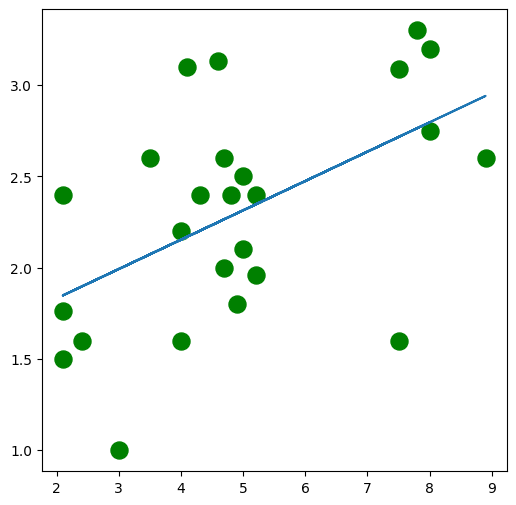

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(x_train, y_train, c="green", s=150, label="Original Data")
plt.plot(x_train, predicted, label="Fitted Line") 